# Kaggle Titanic Competition

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training data
titanic_train = pd.read_csv("train.csv")

#Display training data
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Load test data
titanic_test = pd.read_csv("test.csv")

# Display test dataframe
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


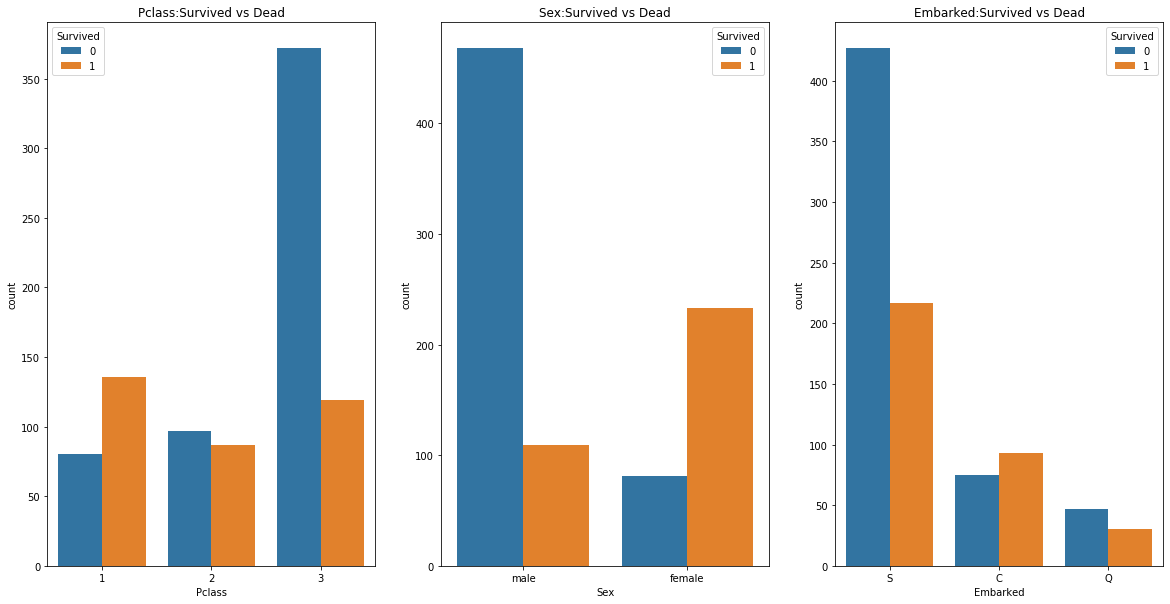

In [4]:
# Explore data: the portion of people who survived by Pclass, Sex, and Embarked
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.countplot('Pclass',hue='Survived',data=titanic_train,ax=ax[0])
ax[0].set_title('Pclass:Survived vs Dead')
sns.countplot('Sex',hue='Survived',data=titanic_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
sns.countplot('Embarked',hue='Survived',data=titanic_train,ax=ax[2])
ax[2].set_title('Embarked:Survived vs Dead')
plt.show()

In [5]:
# Explore the relationship between survival rate and age
# Replace NA data with the most frequently appeared data
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].mean()).astype('int')
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].mean()).astype('int')

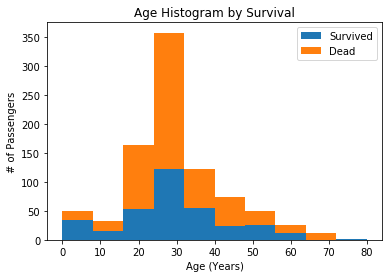

In [6]:
# Explore the relationship between survival rate and age
plt.hist(x = [titanic_train[titanic_train['Survived']==1]['Age'],titanic_train[titanic_train['Survived']==0]['Age']], 
         stacked=True, label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

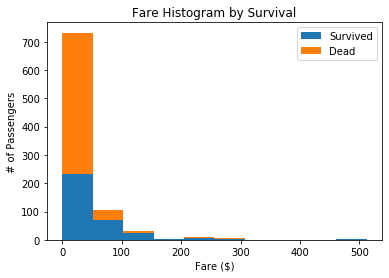

In [7]:
# Explore the relationship between survival rate and fare
plt.hist(x = [titanic_train[titanic_train['Survived']==1]['Fare'],titanic_train[titanic_train['Survived']==0]['Fare']], 
         stacked=True, label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

# Data Washing

In [8]:
# Sex
titanic_train['Sex'] = titanic_train['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_test['Sex'] = titanic_test['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [9]:
# Categorize age into six
age_avg = titanic_train['Age'].mean()
age_std = titanic_train['Age'].std()
titanic_train['CategoricalAge'] = pd.cut(titanic_train['Age'], 6)

In [10]:
# Map Age for training data
titanic_train.loc[titanic_train['Age'] <= age_avg-2*age_std, 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > age_avg-2*age_std) & (titanic_train['Age'] <= age_avg-1*age_std), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > age_avg-1*age_std) & (titanic_train['Age'] <= age_avg), 'Age'] = 3
titanic_train.loc[(titanic_train['Age'] > age_avg)                   & (titanic_train['Age'] <= age_avg+1*age_std), 'Age'] = 4
titanic_train.loc[(titanic_train['Age'] > age_avg+1*age_std) & (titanic_train['Age'] <= age_avg+2*age_std), 'Age'] = 5
titanic_train.loc[titanic_train['Age'] > age_avg+2*age_std, 'Age'] = 6

# Map Age for testing data
titanic_test.loc[titanic_test['Age'] <= age_avg-2*age_std, 'Age'] = 1
titanic_test.loc[(titanic_test['Age'] > age_avg-2*age_std) & (titanic_test['Age'] <= age_avg-1*age_std), 'Age'] = 2
titanic_test.loc[(titanic_test['Age'] > age_avg-1*age_std) & (titanic_test['Age'] <= age_avg), 'Age'] = 3
titanic_test.loc[(titanic_test['Age'] > age_avg)                   & (titanic_test['Age'] <= age_avg+1*age_std), 'Age'] = 4
titanic_test.loc[(titanic_test['Age'] > age_avg+1*age_std) & (titanic_test['Age'] <= age_avg+2*age_std), 'Age'] = 5
titanic_test.loc[titanic_test['Age'] > age_avg+2*age_std, 'Age'] = 6

In [11]:
# Family size
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1

In [12]:
# Categorize Fare
fare_avg = titanic_train['Fare'].mean()
fare_std = titanic_train['Fare'].std()
titanic_train['Fare'] = titanic_train['Fare'].fillna(titanic_train['Fare'].mean())
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].mean())
titanic_train['CategoricalFare'] = pd.cut(titanic_train['Fare'], 6)

In [13]:
# Map Fare for training data
titanic_train.loc[titanic_train['Fare'] <= age_avg-2*age_std, 'Fare'] = 1
titanic_train.loc[(titanic_train['Fare'] > age_avg-2*age_std) & (titanic_train['Fare'] <= age_avg-1*age_std), 'Fare'] = 2
titanic_train.loc[(titanic_train['Fare'] > age_avg-1*age_std) & (titanic_train['Fare'] <= age_avg), 'Fare'] = 3
titanic_train.loc[(titanic_train['Fare'] > age_avg)                   & (titanic_train['Fare'] <= age_avg+1*age_std), 'Fare'] = 4
titanic_train.loc[(titanic_train['Fare'] > age_avg+1*age_std) & (titanic_train['Fare'] <= age_avg+2*age_std), 'Fare'] = 5
titanic_train.loc[titanic_train['Fare'] > age_avg+2*age_std, 'Fare'] = 6

# Map Fare for testing data
titanic_test.loc[titanic_test['Fare'] <= age_avg-2*age_std, 'Fare'] = 1
titanic_test.loc[(titanic_test['Fare'] > age_avg-2*age_std) & (titanic_test['Fare'] <= age_avg-1*age_std), 'Fare'] = 2
titanic_test.loc[(titanic_test['Fare'] > age_avg-1*age_std) & (titanic_test['Fare'] <= age_avg), 'Fare'] = 3
titanic_test.loc[(titanic_test['Fare'] > age_avg)                   & (titanic_test['Fare'] <= age_avg+1*age_std), 'Fare'] = 4
titanic_test.loc[(titanic_test['Fare'] > age_avg+1*age_std) & (titanic_test['Fare'] <= age_avg+2*age_std), 'Fare'] = 5
titanic_test.loc[titanic_test['Fare'] > age_avg+2*age_std, 'Fare'] = 6

In [14]:
# Port of Embarkation
titanic_train['Embarked'].value_counts()
titanic_train['Embarked'] = titanic_train['Embarked'].fillna("S").map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_test['Embarked'] = titanic_test['Embarked'].fillna("S").map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [15]:
# Cabin
titanic_train['Has_Cabin'] = titanic_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanic_test['Has_Cabin']  = titanic_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [16]:
# Drop redundant columns
titanic_train = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','CategoricalAge', 'CategoricalFare'], axis = 1)
titanic_test   = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp'], axis = 1)

In [17]:
titanic_train.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,Has_Cabin
0,0,3,1,3,0,2.0,0,2,0
1,1,1,0,4,0,6.0,1,2,1
2,1,3,0,3,0,2.0,0,1,0
3,1,1,0,4,0,5.0,0,2,1
4,0,3,1,4,0,2.0,0,1,0
5,0,3,1,3,0,2.0,2,1,0
6,0,1,1,5,0,5.0,0,1,1
7,0,3,1,1,1,3.0,0,5,0
8,1,3,0,3,2,2.0,0,3,0
9,1,2,0,2,0,4.0,1,2,0


In [18]:
titanic_test.head(10)

,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,Has_Cabin
0,3,1,4,0,2.0,2,1,0
1,3,0,5,0,2.0,0,2,0
2,2,1,6,0,2.0,2,1,0
3,3,1,3,0,2.0,0,1,0
4,3,0,3,1,2.0,0,3,0
5,3,1,2,0,2.0,0,1,0
6,3,0,4,0,2.0,2,1,0
7,2,1,3,1,3.0,0,3,0
8,3,0,3,0,2.0,1,1,0
9,3,1,3,0,3.0,0,3,0


C:\Users\zerat\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\zerat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\zerat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


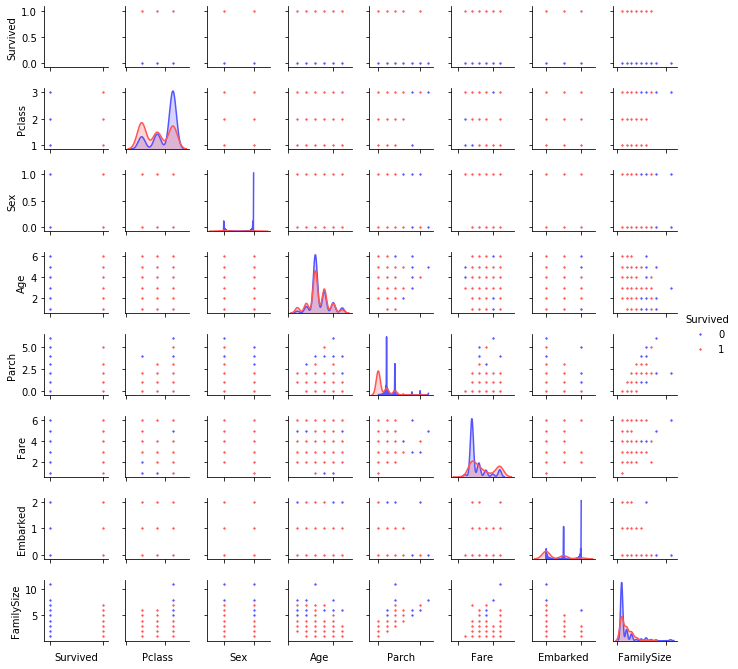

In [19]:
# Pair plots
pp = sns.pairplot(titanic_train[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize']], 
                  hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
pp.set(xticklabels=[])

# Data Modeling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

C:\Users\zerat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zerat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zerat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


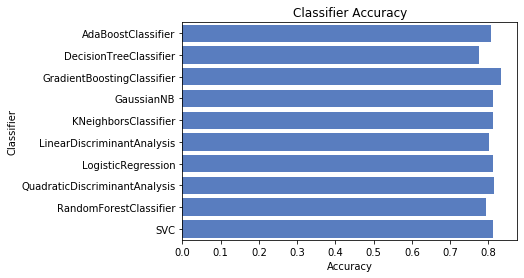

In [21]:
#Compare different ML models' accuracies
classifiers = [
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(),
    SVC(probability=True)]

log_cols = ["Classifier", "Accuracy"]
log         = pd.DataFrame(columns=log_cols)

Features= ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Has_Cabin']
x = titanic_train[Features]
y = titanic_train.Survived
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_x, train_y)
    train_predictions = clf.predict(val_x)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [22]:
# Print Accuracy
log

,Classifier,Accuracy
0,AdaBoostClassifier,0.807175
0,DecisionTreeClassifier,0.775785
0,GradientBoostingClassifier,0.834081
0,GaussianNB,0.811659
0,KNeighborsClassifier,0.811659
0,LinearDiscriminantAnalysis,0.802691
0,LogisticRegression,0.811659
0,QuadraticDiscriminantAnalysis,0.816143
0,RandomForestClassifier,0.793722
0,SVC,0.811659


In [23]:
# Predict the survival rate
candidate_classifier = GradientBoostingClassifier()
candidate_classifier.fit(x, y)
result = candidate_classifier.predict(titanic_test.values)

In [24]:
# Cross validation and confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(candidate_classifier, train_x, train_y, cv=3)
confusion_matrix(train_y, predictions)

array([[360,  50],
       [ 87, 171]], dtype=int64)

In [25]:
# Calculate precission and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(train_y, predictions))
print("Recall:",recall_score(train_y, predictions))

Precision: 0.7737556561085973
Recall: 0.6627906976744186


In [26]:
# Save predictions to csv
submission = pd.DataFrame()
submission["PassengerId"] = pd.read_csv("test.csv")["PassengerId"]
submission["Survived"] = result
submission.to_csv("submission.csv", index=False)